# DECISION TREE

# 1.DATA PREPARATION

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/reddyharshayadhav/Downloads/heart_disease.csv")
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


# 2.EXPLORATORY DATA ANALYSIS(EDA)

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
# Check missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

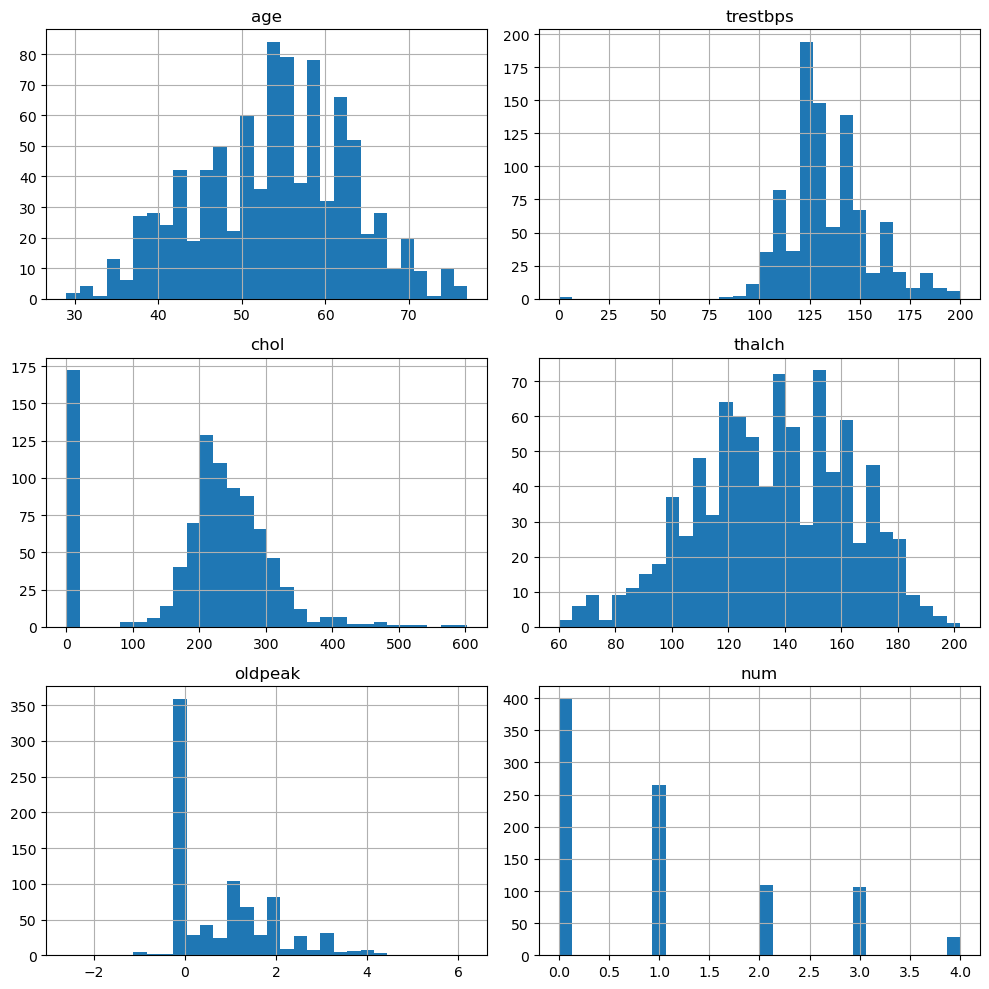

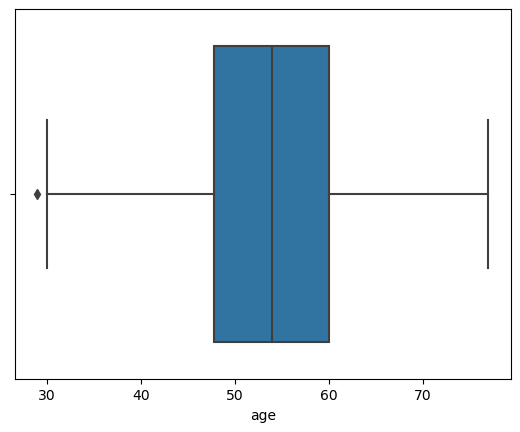

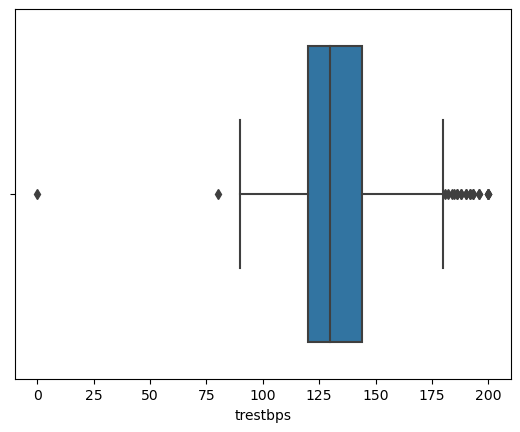

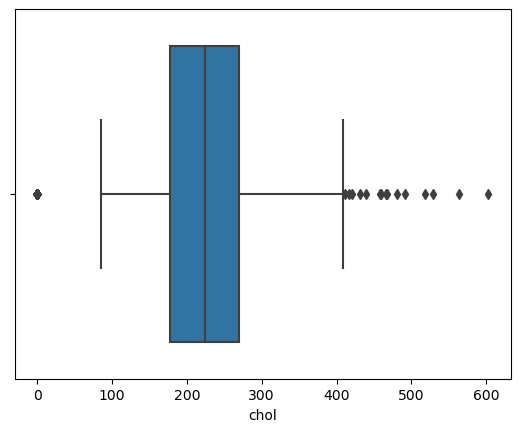

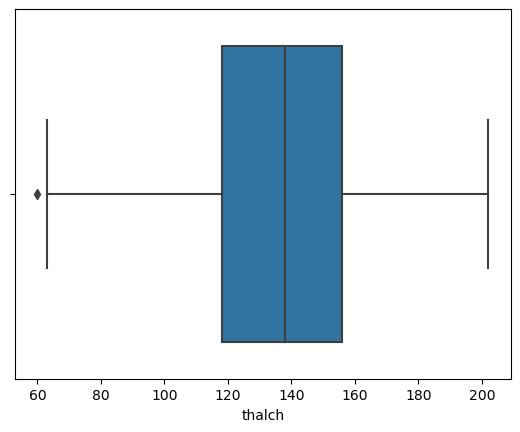

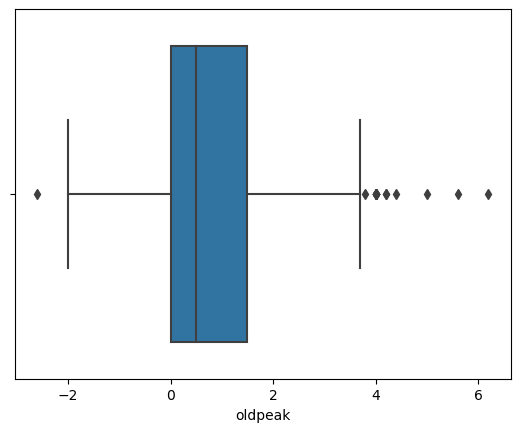

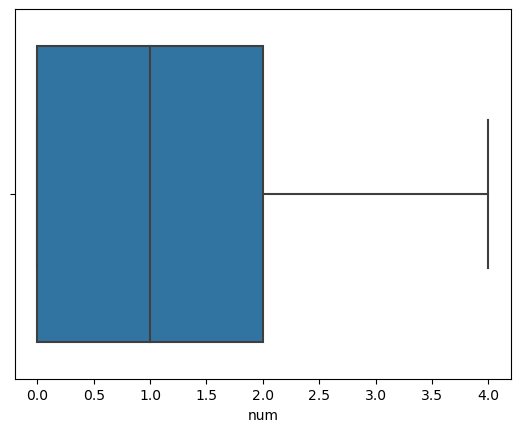

C:\Users\Admin\AppData\Local\Temp\ipykernel_10988\1062236960.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


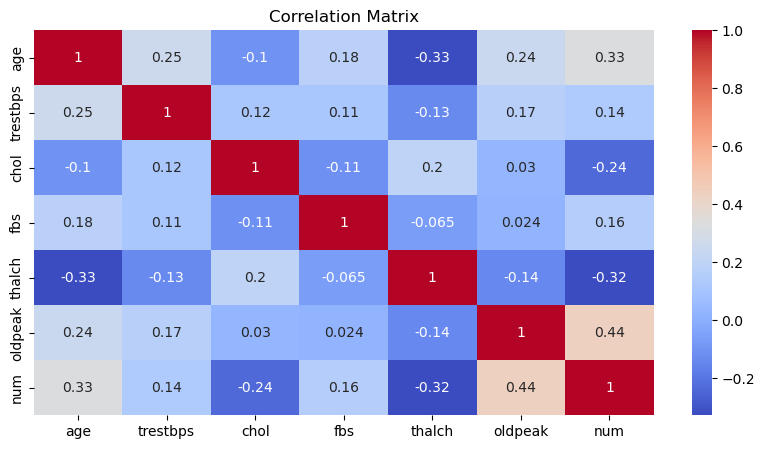

In [7]:
#importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
df.hist(bins=30, figsize=(10, 10))
plt.tight_layout()
plt.show()
# Box plots for outliers
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[column])
    plt.show()
# Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# 3.FEATURE ENGINEERING

In [9]:
import warnings
warnings.filterwarnings('ignore')
df.median()
# Fill missing values 
df.fillna(df.median(), inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,normal,4


"""-->Decision Trees handle categorical variables encoded as labels well — no need for one-hot encoding in many cases.
-->They are insensitive to feature scaling, so normalization or standardization isn't required.
-->Trees can handle missing values to some extent, and simple imputation (fillna) is often sufficient.
so we can't perform task Feature Engineering
Feature engineering was minimal — only LabelEncoder and fillna() were used."""

# 4.DECISION TREE CLASSIFICATION

In [12]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
le = LabelEncoder()
# List of categorical columns to encode
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
X = df.drop(['num', 'target'], axis=1)
y = df['target']
X = df.drop('num', axis=1)
y = df['num']
X
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

# 5.Hyperparameter Tuning:

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#TRAIN THE DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
# Create and train the model
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# 6.Model Evaluation

Accuracy: 0.6978021978021978


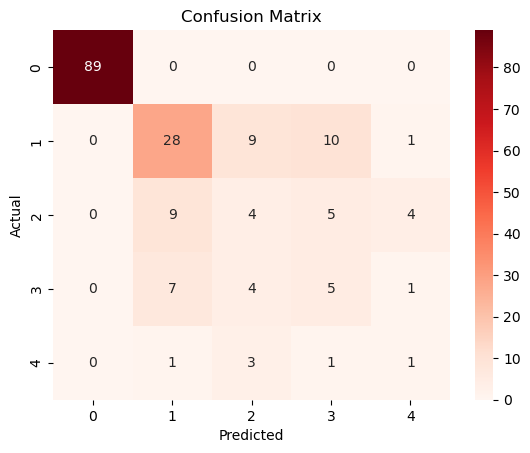

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.62      0.58      0.60        48
           2       0.20      0.18      0.19        22
           3       0.24      0.29      0.26        17
           4       0.14      0.17      0.15         6

    accuracy                           0.70       182
   macro avg       0.44      0.45      0.44       182
weighted avg       0.70      0.70      0.70       182



In [15]:
#MODEL EVALUATION
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Classification Report
print(classification_report(y_test, y_pred))

# DECISION TREE

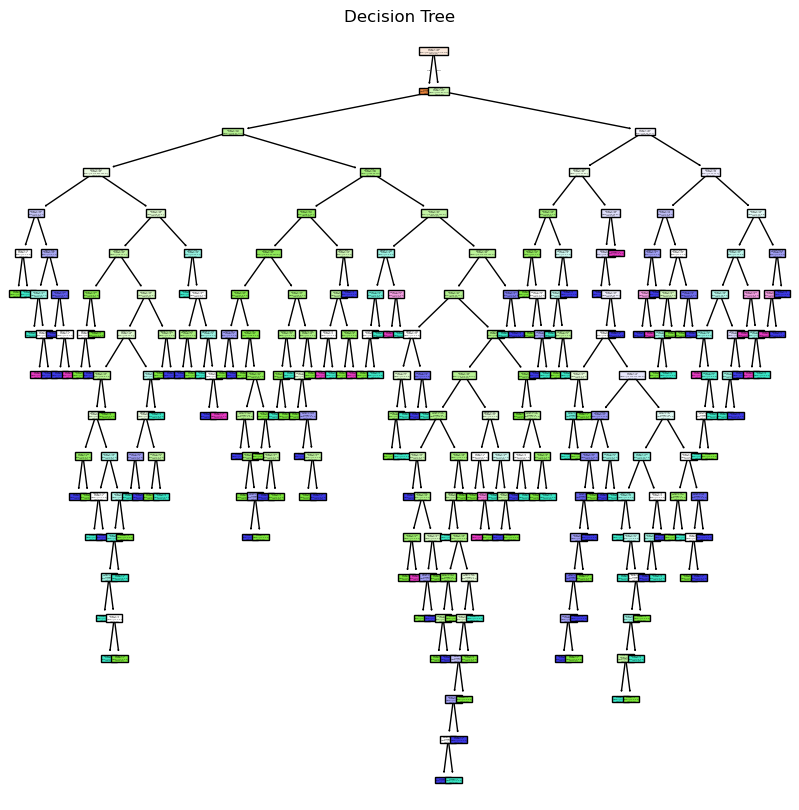

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree")
plt.show()

The model achieved a moderate accuracy of 69.78% after tuning.
Precision and recall were high for class 0 but poor for other classes, indicating class imbalance.
This suggests the model struggles to generalize across all target classes.

#INTERVIEW QUESTIONS
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
-->max_depth: Limits the depth of the tree to prevent overfitting.
-->min_samples_split: Minimum number of samples required to split a node; higher values reduce overfitting.
-->criterion (gini or entropy) determines the function to measure the quality of a split.
-->min_samples_leaf: Sets the minimum number of samples at a leaf node; useful for smoothing the model.

2. What is the difference between Label Encoding and One-Hot Encoding?
-->Label Encoding assigns an integer value to each category (e.g., Red=0, Blue=1). It introduces ordinal relationships which may mislead some models.
-->One-Hot Encoding creates binary columns for each category, avoiding any implicit order, making it ideal for nominal (non-ordinal) data.
-->One-hot is generally safer for ML models that assume numerical distance between values.